# A simple static-size population model of Wright-Fisher for educational purposes.

### Needed Libraries:

"import" function loads a set of ready-to-use code or a library into the memory (for each tab separately).<br/>
You can omit "as [name]", but you have to use the complete name of the library and the functions every time you call it later on.<br/>
For predifined modules, functions and instances of each library, type the name of library, put a dot, and press tab to view and select available options.<br/>
For function definitions and usage, after entering function name, press shift + tab.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
# an alternative way to write this:
# import matplotlib.pyplot as plt
import seaborn as sns
# Settings for seaborn:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
# These two reporting lines are optional:
for i in (np, plt, sns):
    print (i , "was imported successfuly.")

<module 'numpy' from 'C:\\Users\\aroutin-q\\AppData\\Local\\Continuum\\miniconda3\\lib\\site-packages\\numpy\\__init__.py'> was imported successfuly.
<module 'matplotlib.pyplot' from 'C:\\Users\\aroutin-q\\AppData\\Local\\Continuum\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'> was imported successfuly.
<module 'seaborn' from 'C:\\Users\\aroutin-q\\AppData\\Local\\Continuum\\miniconda3\\lib\\site-packages\\seaborn\\__init__.py'> was imported successfuly.


## Lesson One: Producing a population
In the next three cells, we will produce a population with a defined number (N) of elements, and then assign each one an initial Genotype.</b>
Genotype is only a reference to the element's properties, there are no sequences in this simulation.</b>
Genotype of one individual consists of three parameters; two variables and one integer.</b>

    - The first parameter, which is fixed for now, is the initial fitness, or w, which is 1. if no mutation happens, the individual's fitness will remain 1
        (it means that each individual in our population has the same chance of replicating, but in this lesson, no replication accures).
        
    - The second parameter is a user-defined variable, it is the genomic mutation rate denoted by U.
        for this lesson, the mutation rate is an integer for simplification, the number of mutations is derived from U by a random choice.
        
    - The third parameter in index, which only counts individuals and assigns a placeholder for later identification of the element.

There is also the population size:
- N: Number of elements (population size).

In [29]:
U = int(input("Input number of genomic mutations per element per generation, 1 is one in a thousend element, 10 is one in 100 elements, and so on."))
N = int(input("Population size?:"))
# The next function derives mutation frequency depending on the mutation rate from a poisson distribution,
mut_num = np.random.poisson(U)
print ("number of mutation incidents will be: ", mut_num)

Input number of genomic mutations per element per generation, 1 is one in a thousend element, 10 is one in 100 elements, and so on. 1
Population size?: 20


number of mutation incidents will be:  1


The next function mutates initial fitness (1 in the default case), depending on number of mutations in
one generation, if no mutation exists, it returns the initial fitness, if there are mutations, a fitness effect (s) is drawn from
a random number between -0.1 and +0.1, and added to fitness.
each fitness effect (depending on mut_num) is added to the current fitness, in this linear model, epistasis is not considered,
and since our elements are haplotype genomes, mendelian inheritance is irrelevant.

In [30]:
def mutate():
    w = 1
    for i in range(mut_num):
        s = (np.random.choice(100) / 1000) + (np.random.choice(100) / -1000)
        w += s
        return w

For low mutation rates, the mutation number is either 0 or only 1 mutation per generation per element, thus, in this lesson, mutations rates higher than 1 per element is accepted to serve the lesson's purpose. </b>
Exercise 1: Run this population with different parameters.

Population : [(0.995, 0), (1.008, 1), (0.994, 2), (0.964, 3), (1.054, 4), (0.921, 5), (1.028, 6), (0.997, 7), (1.067, 8), (0.9359999999999999, 9), (0.958, 10), (0.994, 11), (1.048, 12), (0.921, 13), (0.906, 14), (0.976, 15), (1.002, 16), (1.085, 17), (0.961, 18), (0.935, 19)] : size : 20


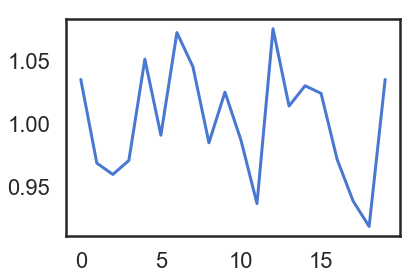

In [31]:
Population = []
fitnesses = []
for i in range (N):
    Population.append((mutate(),i))
    fitnesses.append(mutate())
print ("Population :", Population, ": size :", N)
plot1 = plt.plot(fitnesses)